### Import all necessary libraries

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

### Let's have a look at the data

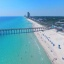

In [2]:
im=Image.open('input/Getretore_Image_Classification_dataset/seg_train/seg_train/bahari/0BJ73JDNTU36.jpg')
im

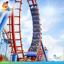

In [3]:
# Let's have a look at another image
im2=Image.open('input/Getretore_Image_Classification_dataset/seg_train/seg_train/Taman Hiburan/Taman Hiburan_27.jpg')
im2

### Build the model for multiclass classification with 6 classes

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [6]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('input/Getretore_Image_Classification_dataset/seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 1)
test_set = test_datagen.flow_from_directory('input/Getretore_Image_Classification_dataset/seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 1)

Found 660 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


### Define the callback function with desired training accuracy

In [8]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.94:
            print("\nReached 94% accuracy, stopping training!")
            self.model.stop_training = True

# Create an instance of the callback
accuracy_callback = AccuracyCallback()

In [9]:
len(set(training_set.classes))

6

In [10]:
fitted_model = model.fit(training_set,
                        steps_per_epoch = 100,
                        epochs = 200,
                        validation_data = test_set,
                        validation_steps = 100, callbacks = accuracy_callback)

Epoch 1/200
100/100 [==============================] - 10s 32ms/step - loss: 1.9360 - accuracy: 0.1500 - val_loss: 1.7850 - val_accuracy: 0.1667
Epoch 2/200
100/100 [==============================] - 1s 10ms/step - loss: 1.7996 - accuracy: 0.2300
Epoch 3/200
100/100 [==============================] - 1s 8ms/step - loss: 1.7148 - accuracy: 0.2300
Epoch 4/200
100/100 [==============================] - 1s 8ms/step - loss: 1.6980 - accuracy: 0.2600
Epoch 5/200
100/100 [==============================] - 1s 8ms/step - loss: 1.6667 - accuracy: 0.3000
Epoch 6/200
100/100 [==============================] - 1s 8ms/step - loss: 1.5992 - accuracy: 0.3300
Epoch 7/200
100/100 [==============================] - 1s 8ms/step - loss: 1.5416 - accuracy: 0.3200
Epoch 8/200
100/100 [==============================] - 1s 8ms/step - loss: 1.5795 - accuracy: 0.3300
Epoch 9/200
100/100 [==============================] - 1s 9ms/step - loss: 1.5783 - accuracy: 0.3000
Epoch 10/200
100/100 [========================

100/100 [==============================] - 1s 12ms/step - loss: 0.9635 - accuracy: 0.5900
Epoch 78/200
100/100 [==============================] - 1s 11ms/step - loss: 0.8820 - accuracy: 0.6900
Epoch 79/200
100/100 [==============================] - 1s 11ms/step - loss: 0.9047 - accuracy: 0.5900
Epoch 80/200
100/100 [==============================] - 1s 10ms/step - loss: 0.7670 - accuracy: 0.7000
Epoch 81/200
100/100 [==============================] - 1s 10ms/step - loss: 0.8516 - accuracy: 0.6800
Epoch 82/200
100/100 [==============================] - 1s 10ms/step - loss: 0.7876 - accuracy: 0.7300
Epoch 83/200
100/100 [==============================] - 1s 11ms/step - loss: 0.8498 - accuracy: 0.7000
Epoch 84/200
100/100 [==============================] - 1s 10ms/step - loss: 0.7153 - accuracy: 0.7200
Epoch 85/200
100/100 [==============================] - 1s 10ms/step - loss: 0.6752 - accuracy: 0.7300
Epoch 86/200
100/100 [==============================] - 1s 9ms/step - loss: 0.9736 - a

100/100 [==============================] - 1s 10ms/step - loss: 0.6702 - accuracy: 0.8000
Epoch 157/200
100/100 [==============================] - 1s 10ms/step - loss: 0.4280 - accuracy: 0.8700
Epoch 158/200
100/100 [==============================] - 1s 11ms/step - loss: 0.3335 - accuracy: 0.8800
Epoch 159/200
100/100 [==============================] - 1s 11ms/step - loss: 0.3442 - accuracy: 0.8400
Epoch 160/200
100/100 [==============================] - 1s 11ms/step - loss: 0.3244 - accuracy: 0.9200
Epoch 161/200
100/100 [==============================] - 1s 10ms/step - loss: 0.3888 - accuracy: 0.8900
Epoch 162/200
100/100 [==============================] - 1s 10ms/step - loss: 0.5335 - accuracy: 0.8100
Epoch 163/200
100/100 [==============================] - 1s 11ms/step - loss: 0.3856 - accuracy: 0.8800
Epoch 164/200
100/100 [==============================] - 1s 11ms/step - loss: 0.3677 - accuracy: 0.8500
Epoch 165/200
100/100 [==============================] - 1s 11ms/step - loss: 

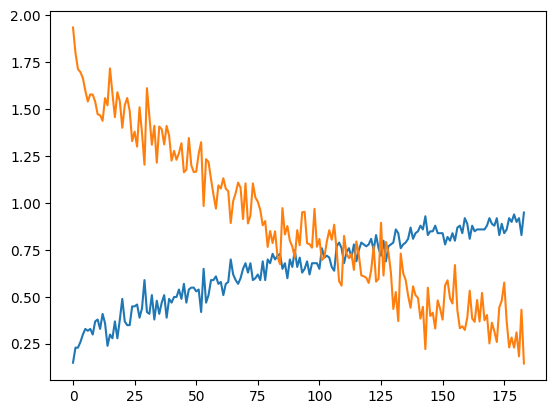

In [19]:
plt.plot(range(len(fitted_model.history['accuracy'])), fitted_model.history['accuracy'])
plt.plot(range(len(fitted_model.history['loss'])), fitted_model.history['loss'])

In [20]:
def image_predictions(path):
    predictions = model.predict(test_set)
    predicted_classes = np.argmax(predictions, axis=-1)
    l=os.listdir('input/Getretore_Image_Classification_dataset/seg_train/seg_train')
    l.sort()
    return l[predicted_classes[0]]

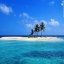

In [21]:
imagee1=Image.open('input/Getretore_Image_Classification_dataset/seg_pred/30AHLXDUIW8T.jpg')
imagee1

In [23]:
# Let's make prediction for the above image
image_predictions('imagee1')

90/90 [==============================] - 1s 5ms/step


'Bahari'

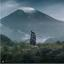

In [24]:
imagee2=Image.open('input/Getretore_Image_Classification_dataset/seg_pred/cagarAlam_115.jpg')
imagee2

In [41]:
# Let's make prediction for the above image
image_predictions('imagee2')

90/90 [==============================] - 1s 5ms/step


'Cagar Alam'

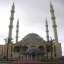

In [39]:
imagee3=Image.open('input/Getretore_Image_Classification_dataset/seg_pred/0HAZ9S44YVQM.jpg')
imagee3

In [60]:
#### Let's make prediction for the above image
image_predictions(imagee3)

90/90 [==============================] - 0s 5ms/step


'Tempat Ibadah'

### Save the model 

In [61]:
model.save("image_getretore.h5")